<a href="https://colab.research.google.com/github/paulrobustelli/CHEM6_S25/blob/main/CHEM6_Lab2_ActivationEnergy_Calc_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHEM 6 - Lab 2 - Chemical Kinetics Part 2**

In this notebook we're going to continue with analyses for fiting kinetics data with python code,  now looking at activation energies

The temperature dependence of rate constants is described by the Arrhenius equation:

$$
k = A \exp\left(\frac{-E_a}{RT}\right)
$$

where k is the rate constant, T is the absolute temperature, $E_{a}$ is the activation energy ofthe reaction, and $A$ is a constant called the pre-exponential factor.

We can take the natural log of both sides of this equation to obtain:

$$
\ln k = \ln A - \frac{E_a}{RT} = \ln A - \left( \frac{E_a}{R} \right) \left( \frac{1}{T} \right)
$$


In this form, the Arrhenius equation predicts a linear relationship between ln k and 1/T. The activation energy can be calculated from rate constants at different temperatures by plotting ln k versus 1/T.

The slope of this plot will be $({E_a}/{R})$  and the y intercept will be
ln A. Note that the temperature must be in units of Kelvin, and the gas constant R mustbe in units of $J mol^{–1}K^{–1}$ (R = 8.314 $J mol^{–1}K^{–1}$) for this relationship to provide an activation energy in the units of J/mol.

But first lets look at one of our prelab questions to review some basics.


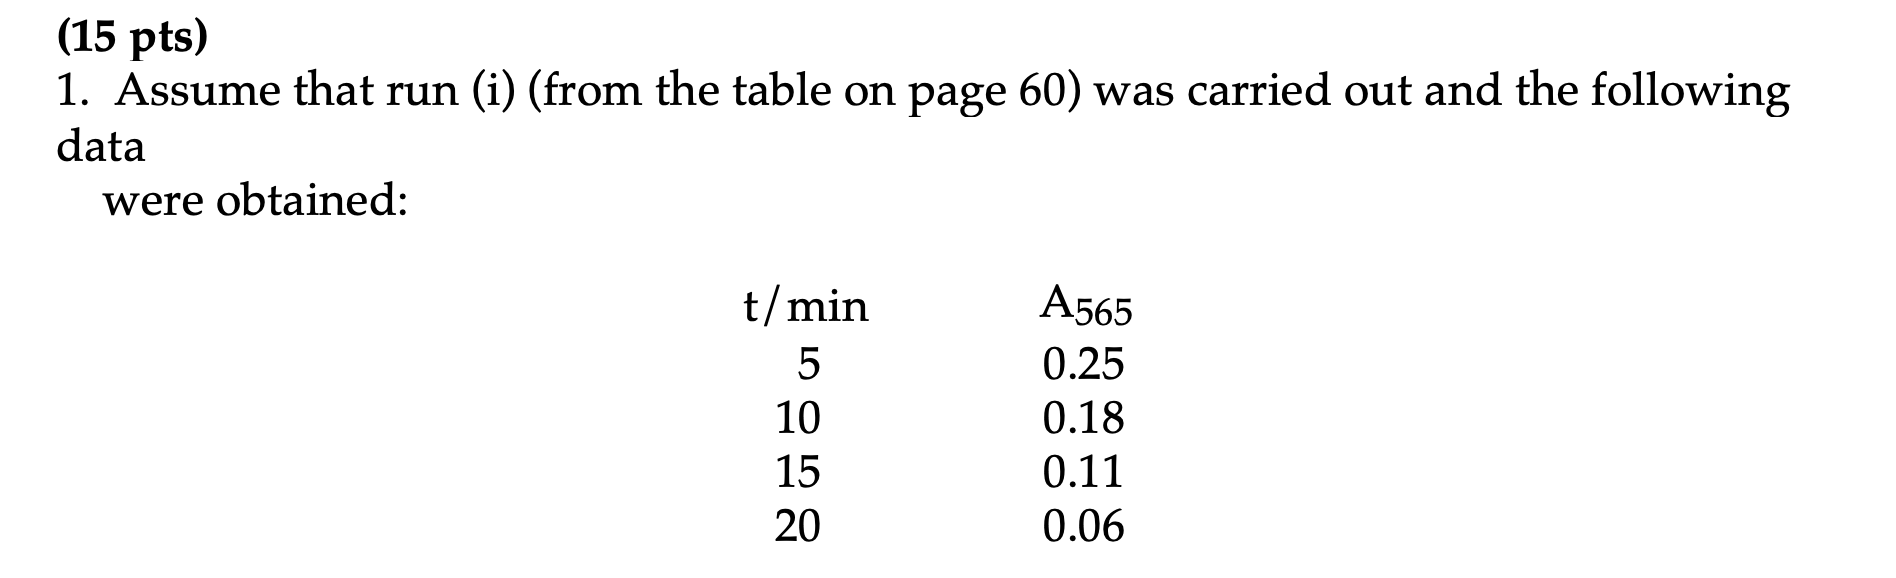

Lets put these into arrays, adding the fact taht we know that at time zero $A_{565}$=-.31

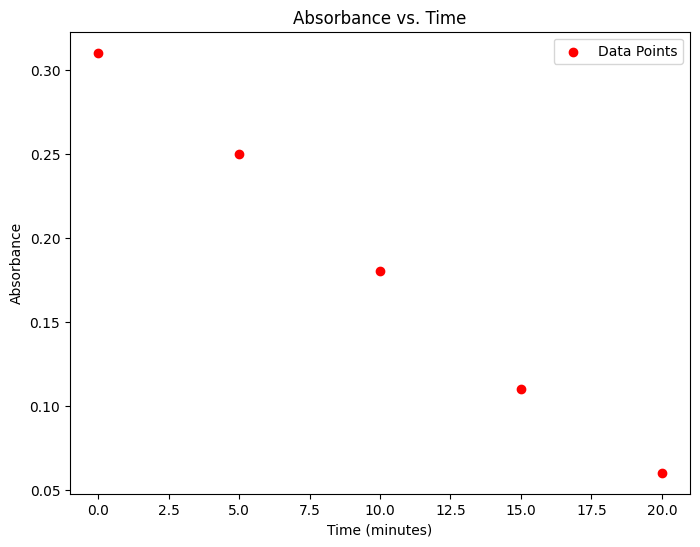

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Relate A_565 to conetration with A=epsilon*c*l
# Time in minutes

#Lets add in the the fact that at t=0, A+0.31
time = np.array([0,5,10,15,20])
A565 = np.array([0.31,0.25,0.18,0.11,0.06])

# Convert time to seconds
time_s = time * 60

# Absorbance at 565 nm
#A565 = np.array([0.29, 0.25, 0.22, 0.19, 0.17, 0.14, 0.12, 0.10, 0.08, 0.06, 0.03])
#conc=A565/90.625

plt.figure(figsize=(8, 6))
plt.scatter(time, A565, marker='o', color='red', label="Data Points")
# Add labels and title
plt.xlabel("Time (minutes)")
plt.ylabel("Absorbance")
plt.title("Absorbance vs. Time")
plt.legend()



Let's use beers law to convert this plot into concentration vs. time.

Beer's law:

$$
A = \varepsilon c l
$$

where

- *A* = Absorbance  
- *ε* = Molar absorptivity (L·mol⁻¹·cm⁻¹)  
- *c* = Concentration of the solution (mol/L)  
- *l* = Path length of the cuvette (cm)


Lets say our starting solution has a concentration of $3.2x10^{-3}$ M of a reactant that corresponds to an absorbance of $A_{565}$=0.31

We can calculate $\epsilon*L$ as

$A=0.31=*\epsilon L*c=\epsilon L* 3.2*10^{-3}M$

$\epsilon L$=96.87

$c=\frac{A}{96.87}$


So lets convert the graph above from units of Absorbance to units of concentration.

[   0  300  600  900 1200]
[0.00320017 0.00258078 0.00185816 0.00113554 0.00061939]


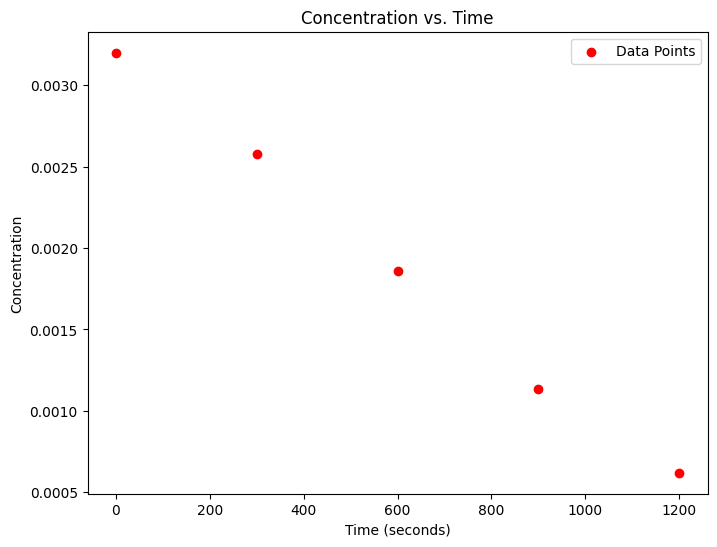

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Time in minutes
time = np.array([0,5,10,15,20])
time_s=time*60

A565 = np.array([0.31,0.25,0.18,0.11,0.06])
conc=A565/96.87
#Lets confirm our values of time look reasonable, and check the plot came out correctly.
print(time_s)
print(conc)

# Plot the data vs. time in seconds
plt.figure(figsize=(8, 6))
plt.scatter(time_s, conc, marker='o', color='red', label="Data Points")
# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Concentration")
plt.title("Concentration vs. Time")
plt.legend()

Now Lets plot the best fit line

No lets get a best fit line

[   0  300  600  900 1200]
[0.00320017 0.00258078 0.00185816 0.00113554 0.00061939]
Slope: -2.2022642028835896e-06
Intercept: 0.003200165169815216
R-squared: 0.997078870496592
Residuals: [ 0.00000000e+00  4.12924538e-05 -2.06462269e-05 -8.25849076e-05
  6.19386807e-05]


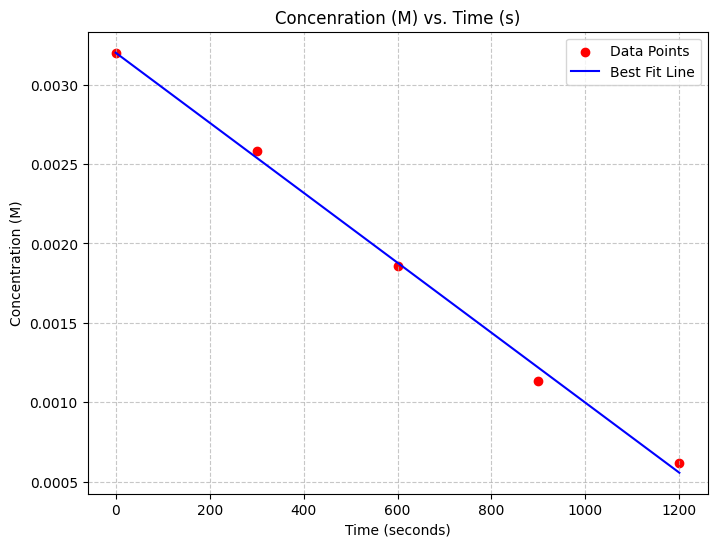

(-0.02, 0.02)

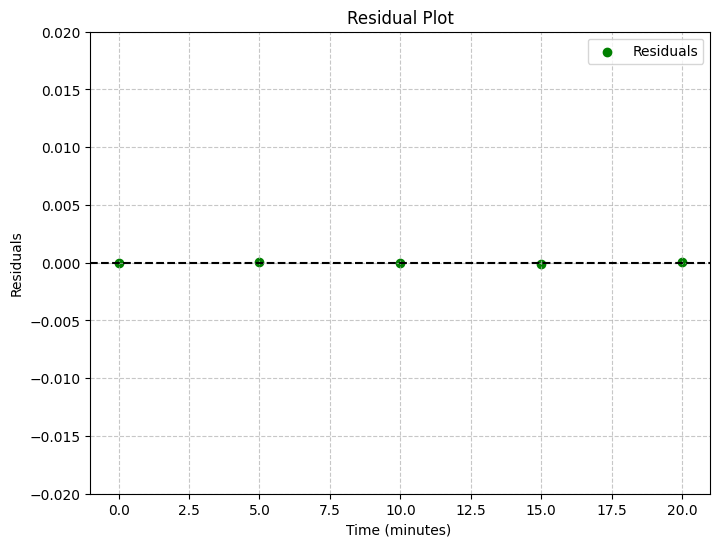

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Time in minutes
time = np.array([0,5,10,15,20])
time_s=time*60

A565 = np.array([0.31,0.25,0.18,0.11,0.06])
conc=A565/96.87
#Lets confirm our values of time look reasonable, and check the plot came out correctly.
print(time_s)
print(conc)


# Calculate the linear regression (best fit line)
slope, intercept, r_value, p_value, std_err = linregress(time_s,conc)

# Create the best fit line
best_fit_line = slope * time_s + intercept

# Calculate residuals
residuals = conc - best_fit_line

# Print the regression results and residuals
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Residuals:", residuals)

# Plot the original data and the best fit line
plt.figure(figsize=(8, 6))
plt.scatter(time_s, conc, marker='o', color='red', label="Data Points")
plt.plot(time_s, best_fit_line, color='blue', label="Best Fit Line")

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Concentration (M)")
plt.title("Concenration (M) vs. Time (s)")
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(time, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Time (minutes) ")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(-0.02, 0.02)  # Set x-axis limits

So we've pulled off a slope of -2.27*$10^{-6}$ in units of $M^{-1}s^{-1}$

The rate of change of $\frac{-d([I_{2}]+[I_{3}^{-}])}{dt}=2.27*10^{-6} M^{-1}s^{-1}$

Note that in your lab - you are asked to use this value of k', together with the concentrations of $[H^{+}]$ and $[C_{6}H_{10}O]$ to find the value of k corresponding to the relationship.

$Rate = -\frac{d([I_{2}]+[I_{3}^{-}])}{dt}=k*[H^{+}][C_{6}H_{10}O]$

or alternatively

$-\frac{d([I_{2}]+[I_{3}^{-}])}{dt}\frac{1}{[H^{+}][C_{6}H_{10}O]}=k$

So from our rate from above we can determine k for the reaction.

As quoted in the lab manual. use the initial and final concentrations of $[H^{+}]$ and $[C_{6}H_{10}O]$ to estimate the average concentrations for the reaction.



**Back to activation energy**

**In your lab you're going to determine a number of rates of the above reaction at different temperatures, and calculate on activation energy $E_{a}$ from the Arrhenius equation.**


𝑘=𝐴exp(−𝐸𝑎𝑅𝑇)

where k is the rate constant, T is the absolute temperature,  𝐸𝑎  is the activation energy ofthe reaction, and  𝐴  is a constant called the pre-exponential factor.

We can take the natural log of both sides of this equation to obtain:

ln𝑘=ln𝐴−𝐸𝑎𝑅𝑇=ln𝐴−(𝐸𝑎𝑅)(1𝑇)

In this form, the Arrhenius equation predicts a linear relationship between ln k and 1/T. The activation energy can be calculated from rate constants at different temperatures by plotting ln k versus 1/T.

The slope of this plot will be  (𝐸𝑎/𝑅)  and the y intercept will be ln A. Note that the temperature must be in units of Kelvin, and the gas constant R mustbe in units of  𝐽𝑚𝑜𝑙–1𝐾–1  (R = 8.314  𝐽𝑚𝑜𝑙–1𝐾–1 ) for this relationship to provide an activation energy in the units of J/mol.



Ultimately you'll end up with a series of temperatures and rate constants.  

Lets look at some hypothetical data:

Temperature=[42,32,22,12]

Rate_Constant=[0.047,0.026,0.0097,0.003]

Lest put these values into numpy arrays and plot them

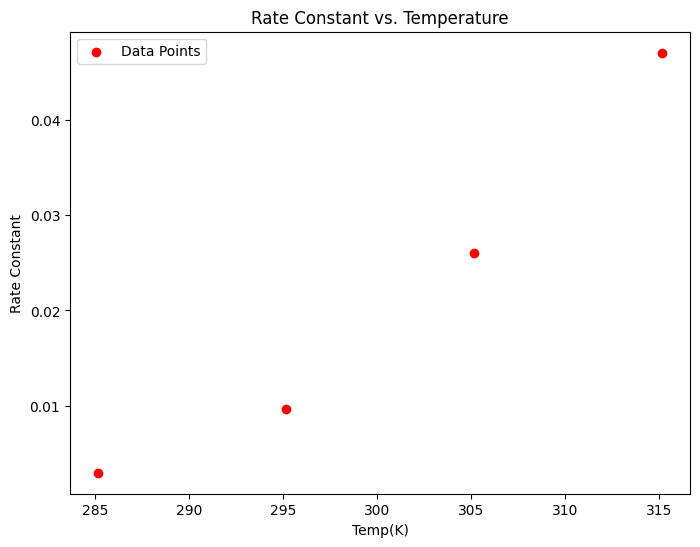

In [ ]:
#Lest put these values into numpy arrays and plot them

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Time in minutes
TempC = np.array([42,32,22,12])
#Convert to Kevlin
TempK=TempC+273.15
time_s=time*60

#ks= np.array([4.7,2.6,0.97,0.3])
ks= np.array([.047,.026,.0097,0.003])


# Plot the data vs. time in seconds
plt.figure(figsize=(8, 6))
plt.scatter(TempK, ks, marker='o', color='red', label="Data Points")
# Add labels and title
plt.xlabel("Temp(K)")
plt.ylabel("Rate Constant")
plt.title("Rate Constant vs. Temperature")
plt.legend()

Lets turn this into a plot of log(k) vs 1/T

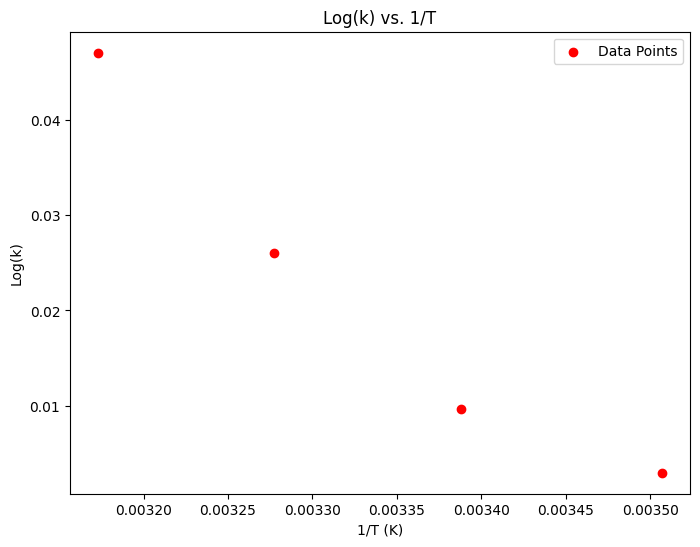

In [ ]:
#Lest put these values into numpy arrays and plot them

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Time in minutes
TempC = np.array([42,32,22,12])
#Convert to Kevlin
TempK=TempC+273.15
RecipT=1.0/TempK
time_s=time*60

ks= np.array([.047,.026,.0097,0.003])
logk=np.log(ks)

# Plot the data vs. time in seconds
plt.figure(figsize=(8, 6))
plt.scatter(RecipT, ks, marker='o', color='red', label="Data Points")
# Add labels and title
plt.xlabel("1/T (K)")
plt.ylabel("Log(k)")
plt.title("Log(k) vs. 1/T")
plt.legend()

Now lets for the slope which will be equal to


Slope$=-\frac{E_{a}}{RT}$


Slope: -8333.199221510367
Intercept: 23.51404900130879
R-squared: 0.9874401098119413
Residuals: [-0.12964741  0.14482649  0.0840984  -0.09927749]


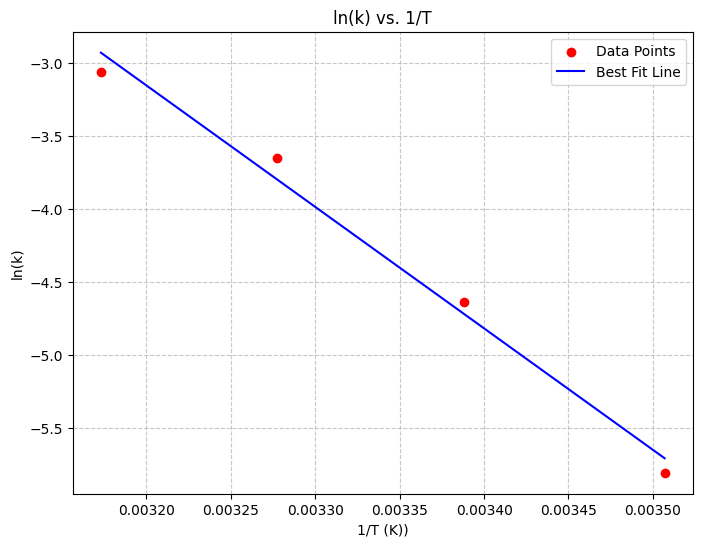

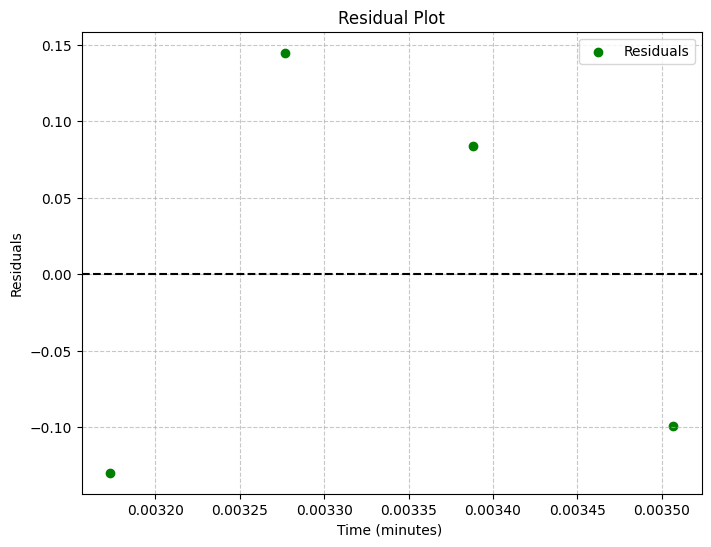

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Time in minutes
TempC = np.array([42,32,22,12])
#Convert to Kevlin
TempK=TempC+273.15
RecipT=1.0/TempK

ks= np.array([.047,.026,.0097,0.003])
logk=np.log(ks)

# Calculate the linear regression (best fit line)
slope, intercept, r_value, p_value, std_err = linregress(RecipT,logk)

# Create the best fit line
best_fit_line = slope * RecipT + intercept

# Calculate residuals
residuals = logk - best_fit_line

# Print the regression results and residuals
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Residuals:", residuals)

# Plot the original data and the best fit line
plt.figure(figsize=(8, 6))
plt.scatter(RecipT, logk, marker='o', color='red', label="Data Points")
plt.plot(RecipT, best_fit_line, color='blue', label="Best Fit Line")

# Add labels and title
plt.xlabel("1/T (K))")
plt.ylabel("ln(k)")
plt.title("ln(k) vs. 1/T")
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(RecipT, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Time (minutes) ")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
#plt.ylim(-0.02, 0.02)  # Set x-axis limits

Accordingly,

Slope=$-\frac{E_{a}}{R}$

$E_{a}$=Slope*$R$

$E_{a}$=8333$K$*8.314$J*mol^{-1}K^{-1}$

$E_{a}$=69280J*mol^{-1}

$E_{a}$=69.3kJ*mol^{-1}

